In [24]:
import pandas as pd 
import numpy as np
! pip install seaborn # bn install el seaborn library 3shan lw msh mwgooda w bnstkhdmha fel advanced visualizations
! pip install ydata_profiling
from ydata_profiling import ProfileReport
import plotly.express as px
import seaborn as sns #statistical plots
import matplotlib.pyplot as plt #base plotting library for fine-tuned control
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") # bt supress el warnings w btkhle el output clean

df = pd.read_csv(r'D:\DEPI_FILTERED_DATA (5).csv')
df.head(10)

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


,student_id,name,subject,score,date,attendance,participation,homework_completion,parent_meeting,semester,performance_level
0,9074,Wael Adel,Art,25.0,2022-06-03,Present,High,True,Missed,Spring 2023,Low
1,1586,Ahmed Mekky,English,38.0,2022-10-23,Absent,Medium,False,Missed,Fall 2022,Low
2,5560,Ehab Hassan,Physical Education,29.0,2023-01-23,Present,Low,Unknown,Unknown,Spring 2023,Low
3,5443,Hassan Soliman,Chemistry,60.0,2023-04-17,Present,High,False,Missed,Fall 2023,Medium
4,9988,Tamer Amin,Math,8.0,2022-04-27,Absent,Medium,False,Attended,Spring 2024,Low
5,4325,Huda Shawky,Geography,12.0,2021-10-02,Present,Low,True,Unknown,Fall 2023,Low
6,3743,Ahmed Adel,History,99.0,2023-04-10,Absent,High,True,Missed,Spring 2024,High
7,4945,Fatma Soliman,Physics,23.0,2022-01-21,Present,Medium,True,Missed,Spring 2024,Low
8,8682,Laila Fathi,Physical Education,47.0,2023-03-16,Present,Unknown,False,Unknown,Fall 2023,Low
9,7049,Youssef Kamel,Physics,10.0,2024-08-14,Present,Medium,False,Missed,Fall 2022,Low


In [25]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 89.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65011 entries, 0 to 65010
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           65011 non-null  int64  
 1   name                 65011 non-null  object 
 2   subject              65011 non-null  object 
 3   score                65011 non-null  float64
 4   date                 65011 non-null  object 
 5   attendance           65011 non-null  object 
 6   participation        65011 non-null  object 
 7   homework_completion  65011 non-null  object 
 8   parent_meeting       65011 non-null  object 
 9   semester             65011 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.0+ MB


In [3]:
df.columns

Index(['student_id', 'name', 'subject', 'score', 'date', 'attendance',
       'participation', 'homework_completion', 'parent_meeting', 'semester'],
      dtype='object')

In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65011 entries, 0 to 65010
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   student_id           65011 non-null  int64         
 1   name                 65011 non-null  object        
 2   subject              65011 non-null  object        
 3   score                65011 non-null  float64       
 4   date                 65011 non-null  datetime64[ns]
 5   attendance           65011 non-null  object        
 6   participation        65011 non-null  object        
 7   homework_completion  65011 non-null  object        
 8   parent_meeting       65011 non-null  object        
 9   semester             65011 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 5.0+ MB


In [6]:
df.date

0       2022-06-03
1       2022-10-23
2       2023-01-23
3       2023-04-17
4       2022-04-27
           ...    
65006   2023-04-17
65007   2023-03-26
65008   2023-11-25
65009   2022-08-19
65010   2021-08-05
Name: date, Length: 65011, dtype: datetime64[ns]

In [7]:
print(df.isnull().sum())


student_id             0
name                   0
subject                0
score                  0
date                   0
attendance             0
participation          0
homework_completion    0
parent_meeting         0
semester               0
dtype: int64


In [8]:
print(df.duplicated().sum())


0


In [9]:
df['attendance'] = df['attendance'].fillna("Absent")
for col in ['participation', 'homework_completion', 'parent_meeting', 'name']:
    df[col] = df[col].fillna("Unknown")



In [10]:
def assign_names_per_subject(df, name):
    df = df.copy()
    for subj, group in df.groupby('subject'):
        m = len(group)
        pool = (names * ((m // len(names)) + 1))[:m]
        random.shuffle(pool)
        df.loc[group.index, 'name'] = pool
    return df

In [11]:
duplicates = df.duplicated(subset=['subject', 'name'], keep=False)
df_duplicates = df[duplicates]
print(df_duplicates)

       student_id            name             subject  score       date  \
0            9074       Wael Adel                 Art   25.0 2022-06-03   
1            1586     Ahmed Mekky             English   38.0 2022-10-23   
2            5560     Ehab Hassan  Physical Education   29.0 2023-01-23   
3            5443  Hassan Soliman           Chemistry   60.0 2023-04-17   
4            9988      Tamer Amin                Math    8.0 2022-04-27   
...           ...             ...                 ...    ...        ...   
65006        2751      Dina Tarek           Chemistry   79.0 2023-04-17   
65007        6838    Laila Yassin           Chemistry   30.0 2023-03-26   
65008        3799     Fatma Tarek             Biology   20.0 2023-11-25   
65009         113     Salma Mekky    Computer Science   24.0 2022-08-19   
65010        4789     Mona Shawky                Math   29.0 2021-08-05   

      attendance participation homework_completion parent_meeting     semester  
0        Present  

In [12]:
df['score'] = df.groupby('subject')['score'].transform(lambda x: x.fillna(x.mean()))


In [13]:
df['attendance'] = df['attendance'].str.strip().str.capitalize()

In [14]:
df.describe()

,student_id,score,date
count,65011.000000,65011.000000,65011
mean,4996.122225,49.980013,2022-12-30 02:39:11.565119744
min,1.000000,0.000000,2021-01-01 00:00:00
25%,2502.000000,27.000000,2022-01-04 00:00:00
50%,4995.000000,50.023260,2023-01-01 00:00:00
75%,7490.000000,72.000000,2023-12-27 00:00:00
max,10000.000000,100.000000,2024-12-28 00:00:00
std,2885.393416,27.625918,NaN


In [15]:
def categorize(score):
    if score >= 85:
        return "High"
    elif score >= 50:
        return "Medium"
    else:
        return "Low"

df['performance_level'] = df['score'].apply(categorize)
print(df['performance_level'])

0           Low
1           Low
2           Low
3        Medium
4           Low
          ...  
65006    Medium
65007       Low
65008       Low
65009       Low
65010       Low
Name: performance_level, Length: 65011, dtype: object


In [16]:
df.isnull().sum()

student_id             0
name                   0
subject                0
score                  0
date                   0
attendance             0
participation          0
homework_completion    0
parent_meeting         0
semester               0
performance_level      0
dtype: int64

In [17]:
df.to_csv('DEPI_FILTERED_DATA (5).csv', index=False)

In [18]:
df.iloc[12036]

student_id                             923
name                           Ahmed Mekky
subject                            History
score                            50.507502
date                   2021-07-10 00:00:00
attendance                          Absent
participation                         High
homework_completion                   True
parent_meeting                     Unknown
semester                       Spring 2023
performance_level                   Medium
Name: 12036, dtype: object

In [19]:
df = df.drop_duplicates(subset=['name', 'subject'])
df.duplicated().sum()

np.int64(0)

In [20]:
df.groupby(['name', 'subject']).size().reset_index(name='count') 


,name,subject,count
0,Ahmed Adel,Art,1
1,Ahmed Adel,Biology,1
2,Ahmed Adel,Chemistry,1
3,Ahmed Adel,Computer Science,1
4,Ahmed Adel,English,1
...,...,...,...
4005,Youssef Yassin,Geography,1
4006,Youssef Yassin,History,1
4007,Youssef Yassin,Math,1
4008,Youssef Yassin,Physical Education,1


In [21]:
mask = (df['name'] == 'Ahmed Mekky') & (df['subject'] == 'History')
count = df[mask].shape[0]

print( count)

1


In [22]:
print(df[mask])

     student_id         name  subject  score       date attendance  \
227        9983  Ahmed Mekky  History   30.0 2023-08-20    Present   

    participation homework_completion parent_meeting   semester  \
227       Unknown               False       Attended  Fall 2022   

    performance_level  
227               Low  


In [23]:
df.to_csv('DEPI_FILTERED_DATA (5).csv', index=False)

In [27]:
import plotly.express as px

fig = px.histogram(
    df,
    x="score",
    nbins=30,
    color="performance_level",
    color_discrete_sequence=px.colors.qualitative.Set2,  # 👈 Beautiful, distinct palette
    title="Distribution of Student Scores by Performance Level",
)
fig.update_layout(
    bargap=0.1,
    template="plotly_white"
)
fig.show()

In [28]:
performance_counts = df["performance_level"].value_counts().reset_index()
performance_counts.columns = ["performance_level", "count"]

fig = px.pie(
    performance_counts,
    names="performance_level",
    values="count",
    hole=0.4,
    color="performance_level",
    color_discrete_sequence=px.colors.qualitative.Set3,
    title="💫 Distribution of Performance Levels"
)
fig.update_traces(textinfo='percent+label', pull=[0.05]*len(performance_counts))
fig.update_layout(template="plotly_white", title_x=0.5)
fig.show()

In [29]:
import plotly.express as px

fig = px.pie(
    df,
    names="parent_meeting",
    title="Parent Meeting Attendance Distribution",
    color="parent_meeting",  # ensure each category gets a color
    color_discrete_sequence=px.colors.qualitative.Vivid  # or 'Set3', 'Pastel1', 'Bold'
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    pull=[0.05 if i % 2 == 0 else 0 for i in range(len(df["parent_meeting"].unique()))]  # adds a subtle pop effect
)
fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    font=dict(size=14),
)
fig.show()

In [30]:
import plotly.express as px

avg_semester = df.groupby("semester", as_index=False)["score"].mean()

fig = px.scatter(
    avg_semester,
    x="semester",
    y="score",
    color="score",
    size="score",
    color_continuous_scale="Viridis",
    title="Average Student Score Across Semesters"
)
fig.update_traces(mode="lines+markers")
fig.update_layout(template="plotly_white", title_x=0.5)
fig.show()

In [40]:
import plotly.express as px

#bageb avg scores per student w bageb top 10
top_students = (
    df.groupby("name", as_index=False)["score"]
      .mean()
      .sort_values("score", ascending=False)
      .head(10)
)

# Line chart
fig = px.line(
    top_students,
    x="name",
    y="score",
    markers=True,
    title="📈 Top 10 Performing Students",
    color_discrete_sequence=["#1f77b4"]  
)

# shaklha 
fig.update_traces(line=dict(width=3, color='royalblue'),
                  marker=dict(size=10, color='orange', line=dict(width=2, color='darkblue')))

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    xaxis_title="Student Name",
    yaxis_title="Average Score",
    font=dict(size=14),
    hovermode="x unified",
)

fig.show()


In [41]:
import plotly.express as px

fig = px.bar(
    df, 
    x="subject", 
    y="score", 
    color="semester", 
    barmode="group",
    title="📚 Average Score per Subject by Semester",
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(template="plotly_white", title_x=0.5)
fig.show()


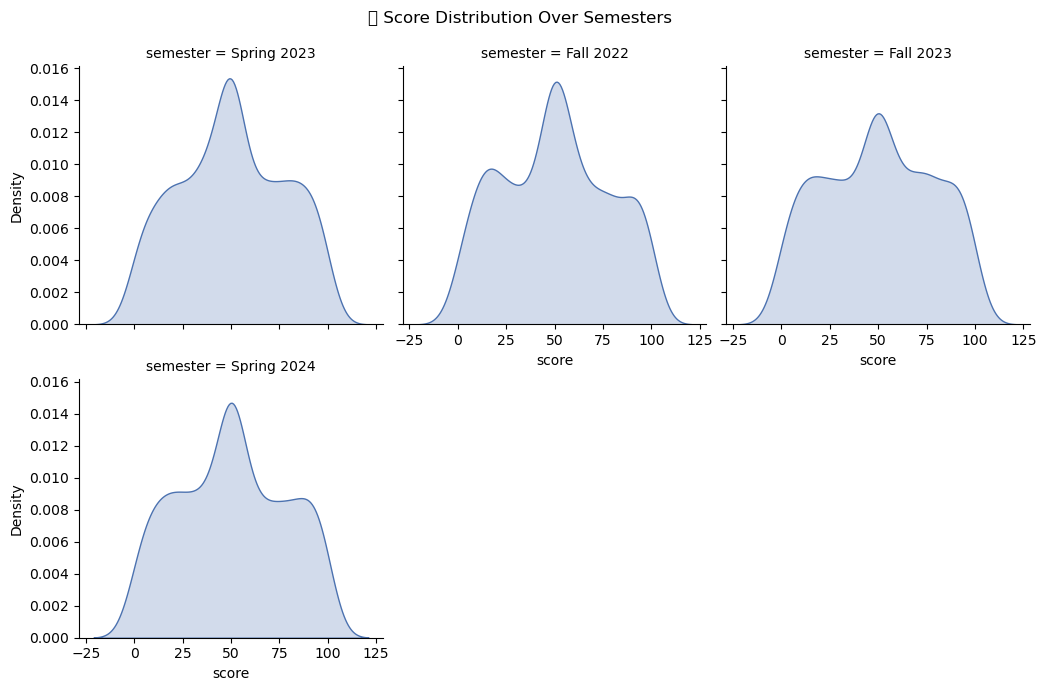

In [ ]:
#score desity f kol sesmter

g = sns.FacetGrid(df, col="semester", col_wrap=3, height=3.5)
g.map(sns.kdeplot, "score", fill=True, color="#4C72B0")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("🎭 Score Distribution Over Semesters")
plt.show()
